El ejercicio consiste en entregar un Notebook con los siguientes puntos:

* Utilizar el API REST de StackEchange (https://api.stackexchange.com/) para obtener una muestra de más de 1000 preguntas sobre un tag concreto. Por ejemplo, el tag podría ser "python". Convertir esos datos en un DataFrame con al menos los siguientes elementos: identificador de usuario, identificador de pregunta, título, si se ha contestado o no, número de veces que se ha visto y fecha de creación. Sobre ese DataFrame , hacer lo siguiente:
	- Buscar la pregunta más antigua no contestada.
	- Obtener y dibujar la distribución de las visitas.
* Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.
* Sobre el DataFrame anterior, extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.


NOTA:

Los tres apartados corresponden, respectivamente a los niveles básico, medio y avanzado.
Para realizarlos hay que invocar a algunas de las llamadas del API de StackExchange, es conveniente primero probarlo con la interfaz de la documentación. Por ejemplo: probar con un identificador concreto de pregunta en la interfaz que aparece al final de esta página: https://api.stackexchange.com/docs/answers-on-questions






In [6]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import re

<h1>Creación del Dataframe</h1>

In [7]:
#Creación del Dataframe

columns = ['questionID', 'userID', 'title', 'answered', 'viewed', 'creationDate']

rows = []

page = 1

has_more = True

while len(rows) < 1000 and has_more:
    
    query = "https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100&order=desc&sort=activity&tagged=python&site=stackoverflow"
    
    r = requests.get(query)
    
    #print(r.text)
    
    jsonDf = json.loads(r.text)
    
    #print(jsonDf)
            
    item = jsonDf['items']
    
    
    
    try:
        for j in range(0,len(item)):
        
            dictionaryColValue = {
                'questionID' : item[j]['question_id'],
                'userID' : item[j]['owner']['user_id'],
                'title' : item[j]['title'],
                'answered' : item[j]['is_answered'],
                'viewed' : item[j]['view_count'],
                'creationDate' : time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(item[j]['creation_date']))
            }
            rows.append(dictionaryColValue)
        
    except KeyError as e:
        print(type(e))
        print(e)
    
    
    
        
    #print(row)
         
    has_more = jsonDf['has_more']
    #print(has_more)
    
    if (has_more == True):
        page += 1
    

df = pd.DataFrame(rows, columns=columns)
df = df.set_index('questionID')    

            
df.size     
   
df

    


{"items":[{"tags":["python","django","django-forms","django-templates","django-views"],"owner":{"reputation":6,"user_id":11070306,"user_type":"registered","profile_image":"https://i.stack.imgur.com/AaFx2.jpg?s=128&g=1","display_name":"bravemaster","link":"https://stackoverflow.com/users/11070306/bravemaster"},"is_answered":false,"view_count":45,"answer_count":1,"score":1,"last_activity_date":1550432172,"creation_date":1550297677,"last_edit_date":1550321227,"question_id":54720439,"link":"https://stackoverflow.com/questions/54720439/django-full-example-of-dropdown-menu-populated-from-postgresql-database","title":"Django Full example of dropdown menu populated from postgresql database"},{"tags":["python","pandas","token"],"owner":{"reputation":1,"user_id":10404683,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/2998dc973891b05f14569c988853b52f?s=128&d=identicon&r=PG&f=1","display_name":"Jeremy_wilk453","link":"https://stackoverflow.com/users/10404683/jeremy-wilk4

{"items":[{"tags":["python","pygame"],"owner":{"reputation":156,"user_id":10469711,"user_type":"registered","profile_image":"https://lh4.googleusercontent.com/-tldYFojPiIA/AAAAAAAAAAI/AAAAAAAACkE/3m4phXIU1sg/photo.jpg?sz=128","display_name":"Eleeza","link":"https://stackoverflow.com/users/10469711/eleeza"},"is_answered":false,"view_count":14,"answer_count":0,"score":-1,"last_activity_date":1550428253,"creation_date":1550428253,"question_id":54736361,"link":"https://stackoverflow.com/questions/54736361/pygame-bullets-shot-in-a-laser-forever-unintentionally-plus-a-side-order-of","title":"Pygame: Bullets shot in a laser, forever, unintentionally. Plus a side order of a transparent image"},{"tags":["python","h5py"],"owner":{"reputation":984,"user_id":2486641,"user_type":"registered","accept_rate":67,"profile_image":"https://www.gravatar.com/avatar/453cbeeefdf85f5a9db823d6be1e6c02?s=128&d=identicon&r=PG","display_name":"ilciavo","link":"https://stackoverflow.com/users/2486641/ilciavo"},"is_

{"items":[{"tags":["python","scrapy","scrapy-spider"],"owner":{"reputation":1,"user_id":11025505,"user_type":"registered","profile_image":"https://lh6.googleusercontent.com/-jpcBJvKMrHs/AAAAAAAAAAI/AAAAAAAAAAA/ACevoQO8NbSG2gQlKVO1l6h-Ks2EmDx7BQ/mo/photo.jpg?sz=128","display_name":"BAYSAN","link":"https://stackoverflow.com/users/11025505/baysan"},"is_answered":false,"view_count":32,"answer_count":0,"score":-1,"last_activity_date":1550422530,"creation_date":1550405966,"last_edit_date":1550422530,"question_id":54733158,"link":"https://stackoverflow.com/questions/54733158/scrapy-framework-is-not-install","title":"Scrapy framework is not install"},{"tags":["python","tree","nlp","nltk","chunking"],"owner":{"reputation":76,"user_id":2498507,"user_type":"registered","accept_rate":0,"profile_image":"https://www.gravatar.com/avatar/3d54ed1b520c3525246d7ac7dda18557?s=128&d=identicon&r=PG","display_name":"Corleone","link":"https://stackoverflow.com/users/2498507/corleone"},"is_answered":true,"view

{"items":[{"tags":["python","dictionary","object","key-value","keyvaluepair"],"owner":{"reputation":89,"user_id":5873823,"user_type":"registered","profile_image":"https://graph.facebook.com/1873448549548497/picture?type=large","display_name":"Feraru Silviu Marian","link":"https://stackoverflow.com/users/5873823/feraru-silviu-marian"},"is_answered":true,"view_count":1238,"closed_date":1513615390,"accepted_answer_id":47872810,"answer_count":1,"score":0,"last_activity_date":1550415656,"creation_date":1513615230,"last_edit_date":1550415656,"question_id":47872781,"link":"https://stackoverflow.com/questions/47872781/how-to-unpack-key-value-pairs-in-python","closed_reason":"duplicate","title":"How to unpack key,value pairs in python?"},{"tags":["python","django","django-models"],"owner":{"reputation":21,"user_id":8318311,"user_type":"registered","profile_image":"https://graph.facebook.com/334356367004057/picture?type=large","display_name":"Адиль Акавов","link":"https://stackoverflow.com/users

{"items":[{"tags":["python","selenium","paypal","webautomation"],"owner":{"reputation":3,"user_id":10371281,"user_type":"registered","profile_image":"https://lh6.googleusercontent.com/-a4GtH07c-pU/AAAAAAAAAAI/AAAAAAAAAAA/APUIFaPMF04i2Qzt8CWJoX1KYDBxq03yeQ/mo/photo.jpg?sz=128","display_name":"Black_lotus","link":"https://stackoverflow.com/users/10371281/black-lotus"},"is_answered":false,"view_count":34,"answer_count":2,"score":0,"last_activity_date":1550406281,"creation_date":1550361545,"question_id":54728855,"link":"https://stackoverflow.com/questions/54728855/selenium-webdriver-stops-with-no-error-message-when-navigating-through-paypal-lo","title":"Selenium webdriver stops with no error-message when navigating through paypal login"},{"tags":["python"],"owner":{"reputation":11,"user_id":10603921,"user_type":"registered","profile_image":"https://lh4.googleusercontent.com/-ytoqjEoIml8/AAAAAAAAAAI/AAAAAAAAAC4/P2Up0BU5uDE/photo.jpg?sz=128","display_name":"mohamed mohamed","link":"https://s

{"items":[{"tags":["python","machine-learning","pytorch","tensor"],"owner":{"reputation":34,"user_id":9536387,"user_type":"registered","profile_image":"https://lh3.googleusercontent.com/-XdUIqdMkCWA/AAAAAAAAAAI/AAAAAAAAAAA/4252rscbv5M/photo.jpg?sz=128","display_name":"ntd","link":"https://stackoverflow.com/users/9536387/ntd"},"is_answered":true,"view_count":39,"accepted_answer_id":54729021,"answer_count":2,"score":3,"last_activity_date":1550398177,"creation_date":1550351443,"question_id":54727686,"link":"https://stackoverflow.com/questions/54727686/concat-tensors-in-pytorch","title":"Concat tensors in PyTorch"},{"tags":["python","python-3.6","aiml"],"owner":{"reputation":1,"user_id":9102954,"user_type":"registered","profile_image":"https://lh4.googleusercontent.com/-51drqY2o2Vk/AAAAAAAAAAI/AAAAAAAAA4s/Zg78yNnaIx8/photo.jpg?sz=128","display_name":"pranshu ranjan","link":"https://stackoverflow.com/users/9102954/pranshu-ranjan"},"is_answered":false,"view_count":11,"answer_count":1,"score"

{"items":[{"tags":["python","python-2.7","printing","stderr","zen"],"owner":{"reputation":162274,"user_id":674039,"user_type":"registered","accept_rate":94,"profile_image":"https://i.stack.imgur.com/leoFi.gif?s=128&g=1","display_name":"wim","link":"https://stackoverflow.com/users/674039/wim"},"is_answered":true,"view_count":653634,"protected_date":1527613020,"closed_date":1550361475,"accepted_answer_id":14981125,"answer_count":16,"score":1078,"last_activity_date":1550387011,"creation_date":1302137950,"last_edit_date":1550387011,"question_id":5574702,"link":"https://stackoverflow.com/questions/5574702/how-to-print-to-stderr-in-python","closed_reason":"primarily opinion-based","title":"How to print to stderr in Python?"},{"tags":["python","kivy"],"owner":{"reputation":120,"user_id":1395646,"user_type":"registered","accept_rate":100,"profile_image":"https://www.gravatar.com/avatar/c59d34e91f5a555f95f314dfced2226f?s=128&d=identicon&r=PG","display_name":"Ryan Hasse","link":"https://stackove

{"items":[{"tags":["python","tkinter"],"owner":{"reputation":4,"user_id":11057391,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/06497cd1e589611aa9863dc56786060c?s=128&d=identicon&r=PG&f=1","display_name":"Saravanan","link":"https://stackoverflow.com/users/11057391/saravanan"},"is_answered":false,"view_count":23,"answer_count":1,"score":0,"last_activity_date":1550374050,"creation_date":1550074385,"last_edit_date":1550080966,"question_id":54674698,"link":"https://stackoverflow.com/questions/54674698/delete-method-in-canvas-tkinter","title":"Delete method in canvas tkinter"},{"tags":["python","discord.py"],"owner":{"reputation":1,"user_id":10748703,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/0438c5870c3b347ede8bb074bcf9eb2d?s=128&d=identicon&r=PG&f=1","display_name":"XRageHypeZz","link":"https://stackoverflow.com/users/10748703/xragehypezz"},"is_answered":true,"view_count":45,"closed_date":1544106256,"answer_count":1,"score":0,"las

{"items":[{"tags":["python","matplotlib","plot"],"owner":{"reputation":13,"user_id":11049307,"user_type":"registered","profile_image":"https://lh6.googleusercontent.com/-z_gnkL1jUNY/AAAAAAAAAAI/AAAAAAAAAAA/ACevoQOp1NbAUuWFCwW1-re1Vtz7313azw/mo/photo.jpg?sz=128","display_name":"James Robisnon","link":"https://stackoverflow.com/users/11049307/james-robisnon"},"is_answered":false,"view_count":10,"closed_date":1550362223,"answer_count":0,"score":-1,"last_activity_date":1550362089,"creation_date":1550362036,"last_edit_date":1550362089,"question_id":54728900,"link":"https://stackoverflow.com/questions/54728900/adding-a-mark-or-symbol-to-a-plot-in-python","closed_reason":"duplicate","title":"Adding a mark or symbol to a plot in Python"},{"tags":["python","mean"],"owner":{"reputation":3,"user_id":11004046,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/5a3e2e64509560b9d66f5d5cc093d80d?s=128&d=identicon&r=PG&f=1","display_name":"Fregata","link":"https://stackoverflow.c

{"items":[{"tags":["python","list","tuples","iteration"],"owner":{"reputation":14,"user_id":9179234,"user_type":"registered","profile_image":"https://i.stack.imgur.com/ry8li.jpg?s=128&g=1","display_name":"me2017","link":"https://stackoverflow.com/users/9179234/me2017"},"is_answered":false,"view_count":39,"answer_count":0,"score":0,"last_activity_date":1550350999,"creation_date":1550344202,"last_edit_date":1550350999,"question_id":54726691,"link":"https://stackoverflow.com/questions/54726691/when-tuple-passes-remove-all-similar-from-list-if-tuple-fails-try-the-next-on","title":"When tuple passes, remove all similar from list. If tuple fails, try the next one"},{"tags":["python","pandas"],"owner":{"reputation":13,"user_id":11072698,"user_type":"registered","profile_image":"https://lh4.googleusercontent.com/-rBWYTxE69x4/AAAAAAAAAAI/AAAAAAAABTA/Nqjy_VDZ1jM/photo.jpg?sz=128","display_name":"Swathi Swathis","link":"https://stackoverflow.com/users/11072698/swathi-swathis"},"is_answered":true,

{"items":[{"tags":["python","tensorflow","tensorboard"],"owner":{"reputation":144,"user_id":2494561,"user_type":"registered","accept_rate":20,"profile_image":"https://graph.facebook.com/100002372903644/picture?type=large","display_name":"Mikhail  M","link":"https://stackoverflow.com/users/2494561/mikhail-m"},"is_answered":false,"view_count":26,"answer_count":0,"score":0,"last_activity_date":1550341725,"creation_date":1520743300,"question_id":49216692,"link":"https://stackoverflow.com/questions/49216692/numerous-restorev2-nodes-in-tensorboard-graph","title":"Numerous RestoreV2_ nodes in TensorBoard graph"},{"tags":["python","tensorflow"],"owner":{"reputation":33,"user_id":5878050,"user_type":"registered","accept_rate":75,"profile_image":"https://i.stack.imgur.com/LeGcV.jpg?s=128&g=1","display_name":"TRV","link":"https://stackoverflow.com/users/5878050/trv"},"is_answered":true,"view_count":13,"accepted_answer_id":54726295,"answer_count":1,"score":0,"last_activity_date":1550341722,"creati

{"items":[{"tags":["python","django"],"owner":{"reputation":5,"user_id":11028222,"user_type":"registered","profile_image":"https://lh3.googleusercontent.com/-SxfdGUAiRDA/AAAAAAAAAAI/AAAAAAAAAAA/AKxrwcZkFjqS36aDsSpOXmg3tc4xI7aNLw/mo/photo.jpg?sz=128","display_name":"Mohammad Hassan Bigdeli Shamlo","link":"https://stackoverflow.com/users/11028222/mohammad-hassan-bigdeli-shamlo"},"is_answered":false,"view_count":17,"answer_count":0,"score":0,"last_activity_date":1550334755,"creation_date":1550334755,"question_id":54725222,"link":"https://stackoverflow.com/questions/54725222/project-may-not-work-properly-until-you-apply-the-migrations-for-apps-but-migr","title":"project may not work properly until you apply the migrations for app(s) but migrations doesn&#39;t work"},{"tags":["python","pandas"],"owner":{"reputation":56,"user_id":1294129,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/d90a000d17c54cce0f6780b732ff10f2?s=128&d=identicon&r=PG&f=1","display_name":"user1

,userID,title,answered,viewed,creationDate
questionID,,,,,
54720439,11070306,Django Full example of dropdown menu populated...,False,45,2019-02-16 07:14:37
54649417,10404683,Python: How to add list of tokens to new colum...,True,48,2019-02-12 12:44:32
54682165,1235929,What&#39;s the standard way of saving somethin...,True,34,2019-02-14 02:59:29
54497059,10404683,Pandas: Filling column in dataset with data fr...,True,39,2019-02-02 21:10:08
54497929,10404683,NetworkX - Setting node attributes from dataframe,True,217,2019-02-02 22:59:04
52804653,10404683,Python - Write new row based on comma-separate...,True,157,2018-10-14 18:17:05
54735423,11075286,How to fix attribute Error for module in PyQt5,False,7,2019-02-17 17:51:55
54736889,9948622,Dynamically creating view not working as intended,False,4,2019-02-17 20:35:18
54736720,6083655,How to stop Tensorflow from ordering &#39;conv...,False,7,2019-02-17 20:15:10


<h1>Pregunta más antigua no contestada</h1>

In [8]:
df

dfNotAnswered = df[df.answered == False]

dfNotAnswered.sort_values('creationDate').head(1)

,userID,title,answered,viewed,creationDate
questionID,,,,,
19045762,2171200,"GDB Python support, ImportError no module name...",False,6559,2013-09-27 10:04:07


<h1>Obtener y dibujar la distribución de las visitas.</h1>

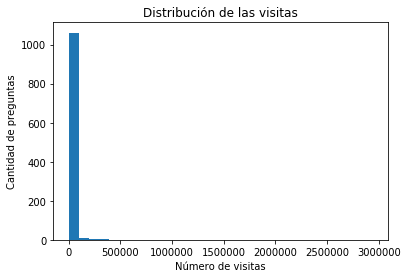

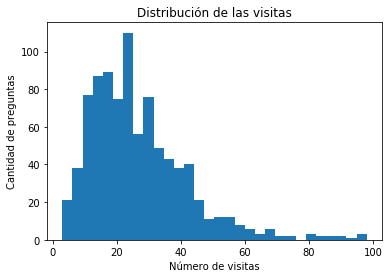

In [9]:
plt.hist(x=df['viewed'], bins=30, align='mid')
plt.xlabel('Número de visitas')
plt.ylabel('Cantidad de preguntas')
plt.title('Distribución de las visitas')
plt.show()

#Como no se puede ver bien la distribución debido a que hay algunas preguntas cuyo número de visitas es muy grande, 
#se van a mostrar las preguntas cuyo número de visitas está en el rango [0,100] que engloba el 81.4% de las preguntas.

df1to100 = df.loc[df.viewed < 100]

plt.hist(x=df1to100['viewed'], bins=30, align='mid')
plt.xlabel('Número de visitas')
plt.ylabel('Cantidad de preguntas')
plt.title('Distribución de las visitas')
plt.show()

<h1>Respuesta más votada</h1>

Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.

In [10]:
dfAnswered = df[df.answered == True]

questionIdArray = dfAnswered.index.values

columnsAnswer = ['questionID', 'answerID', 'answerScore', 'answerCreationDate', 'answerUserID']

startIndex = 0
endIndex = 100

dictionaryArray = {}

end = False

while not end:
    
    #print(startIndex)
    #print(endIndex)
    
    if endIndex > len(dfAnswered):
        endIndex = startIndex + (len(dfAnswered) - startIndex)
        end = True
    
    questionIdArraySliced = questionIdArray[startIndex:endIndex]
        
    questionIdArrayStr = np.array2string(questionIdArraySliced, separator = ";")
    
    cleanQuestionIdArrayStr = re.sub('[^0-9,;]+', '', questionIdArrayStr)
    
    page = 1

    has_more = True
    
    size = 1
    
    while has_more and size > 0:
            
        #print("https://api.stackexchange.com/2.2/questions/" + questionIdArrayStr + "/answers?order=desc&sort=activity&site=stackoverflow")
        queryAnswer = "https://api.stackexchange.com/2.2/questions/" + cleanQuestionIdArrayStr + "/answers?page=" + str(page) + "&pagesize=100&order=desc&sort=activity&site=stackoverflow"

        rAnswer = requests.get(queryAnswer)
        jsonDfAnswer = json.loads(rAnswer.text)

        #print(jsonDfAnswer)

        item = jsonDfAnswer['items']

        size = len(item)
            
        for j in range(0,len(item)):    
            
            try:

                answerInfo = {
                    'questionID': int(item[j]['question_id']),
                    'answerID' : int(item[j]['answer_id']),
                    'answerScore' : int(item[j]['score']),
                    'answerCreationDate' : time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(item[j]['creation_date'])),
                    'answerUserID' : int(item[j]['owner']['user_id'])
                }

                if answerInfo['questionID'] in dictionaryArray:

                    scoreAnswer = dictionaryArray[answerInfo['questionID']]['answerScore']

                    if scoreAnswer < answerInfo['answerScore']:

                        dictionaryArray[answerInfo['questionID']] = answerInfo           

                else:
                    dictionaryArray[answerInfo['questionID']] = answerInfo           
                
            except KeyError as e:
                print(type(e))
                print(e)
            
        has_more = jsonDf['has_more']
        #print(has_more)

        if (has_more == True):
            page += 1

    startIndex = endIndex
    endIndex += 100
    
dfValues = list(dictionaryArray.values())

print(len(dfValues))

#print(dfValues)

dfAnswers = pd.DataFrame(dfValues, columns=columnsAnswer, dtype='object')
dfAnswers = dfAnswers.set_index('questionID')

#print(dfAnswers)

dfMerged = df.merge(dfAnswers, on=['questionID'], how ='left')

dfMerged


<class 'KeyError'>
'user_id'
<class 'KeyError'>
'user_id'
458


,userID,title,answered,viewed,creationDate,answerID,answerScore,answerCreationDate,answerUserID
questionID,,,,,,,,,
54720439,11070306,Django Full example of dropdown menu populated...,False,45,2019-02-16 07:14:37,NaN,NaN,NaN,NaN
54649417,10404683,Python: How to add list of tokens to new colum...,True,48,2019-02-12 12:44:32,54649611,1,2019-02-12 12:56:16,6444605
54682165,1235929,What&#39;s the standard way of saving somethin...,True,34,2019-02-14 02:59:29,54682199,1,2019-02-14 03:03:50,1128047
54497059,10404683,Pandas: Filling column in dataset with data fr...,True,39,2019-02-02 21:10:08,54497404,2,2019-02-02 21:52:58,6858244
54497929,10404683,NetworkX - Setting node attributes from dataframe,True,217,2019-02-02 22:59:04,54662176,3,2019-02-13 04:44:29,6942527
52804653,10404683,Python - Write new row based on comma-separate...,True,157,2018-10-14 18:17:05,52804853,1,2018-10-14 18:39:04,9948827
54735423,11075286,How to fix attribute Error for module in PyQt5,False,7,2019-02-17 17:51:55,NaN,NaN,NaN,NaN
54736889,9948622,Dynamically creating view not working as intended,False,4,2019-02-17 20:35:18,NaN,NaN,NaN,NaN
54736720,6083655,How to stop Tensorflow from ordering &#39;conv...,False,7,2019-02-17 20:15:10,NaN,NaN,NaN,NaN


Sobre el DataFrame anterior, extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.

In [12]:
questionUsers = dfMerged['userID'].values
usersAnswers = dfMerged[dfMerged.answered == True]['answerUserID'].values

allUsers = np.concatenate((questionUsers,usersAnswers))

startIndex = 0
endIndex = 100

mostRep = {
    'userID' : 0,
    'reputation' : 0
}
lessRep = {
    'userID' : 0,
    'reputation' : 100
}

step = 0

end = False

while not end and step < 2:
    
    #print(startIndex)
    #print(endIndex)
    
    if endIndex > len(allUsers):
        endIndex = startIndex + (len(allUsers) - startIndex)
        end = True
    
    allUsersSliced = allUsers[startIndex:endIndex]
    
    allUsersArrayStr = np.array2string(allUsersSliced, separator = ";")
    
    cleanAllUsersArrayStr = re.sub('[^0-9,;]+', '', allUsersArrayStr)
        
    page = 1

    has_more = True
    
    size = 1
    
    while has_more and size > 0:
            
        #print("https://api.stackexchange.com/2.2/questions/" + questionIdArrayStr + "/answers?order=desc&sort=activity&site=stackoverflow")
        queryAnswer = "https://api.stackexchange.com/2.2/users/" + str(cleanAllUsersArrayStr) + "?page=" + str(page) + "&pagesize=100&order=desc&sort=reputation&site=stackoverflow"

        rAnswer = requests.get(queryAnswer)
        jsonDfAnswer = json.loads(rAnswer.text)

        #print(jsonDfAnswer)

        item = jsonDfAnswer['items']        

        size = len(item)
            
        for j in range(0,len(item)):    
            
            try:

                userInfo = {
                    'userID' : item[j]['user_id'],
                    'reputation' : item[j]['reputation']
                }

                if userInfo['reputation'] > mostRep['reputation']:
                    mostRep = userInfo
                    
                if userInfo['reputation'] < lessRep['reputation']:
                    lessRep = userInfo        
                
            except KeyError as e:
                print(type(e))
                print(e)
            
        has_more = jsonDf['has_more']
        #print(has_more)

        if (has_more == True):
            page += 1

    startIndex = endIndex
    endIndex += 100
    
    step += 1
    
print("Most reputation user: ")
print(mostRep)
print("Less reputation user: ")
print(lessRep)


Most reputation user: 
{'userID': 1735406, 'reputation': 73959}
Less reputation user: 
{'userID': 10823562, 'reputation': 1}
